In [1]:
cd ..

/Users/gieunkwak/Data Analytics/Repositories/medium


In [2]:
import numpy as np
import pandas.api.types as ptypes
import matplotlib.pyplot as plt
from math import sqrt
import plotly
import seaborn as sns

Create sample data

In [55]:
data = np.random.normal(100*0.5, sqrt(100*0.5*0.5), size=10000)
outliers = np.random.normal(250, sqrt(100), size=100)

data = np.append(data, outliers)

In [56]:
def identify_outliers(array, quantiles=[i/100 for i in range(90, 101)], 
                                quantiles_specific=[i/1000 for i in range(990, 1001)],
                                only_num_positive=True, title=None, x_lim=None, y_lim=None, verbose=True):
    
    assert ptypes.is_numeric_dtype(array)
    
    if only_num_positive:
        x_array = np.array(array)
        x_array = x_array[np.where(x_array>0)]
    else:
        x_array = np.array(array)
    
    fig, ax1 = plt.subplots(1,1, figsize=(10, 5))
    fig2, ax2 = plt.subplots(1,1, figsize=(10, 5))
    
    sns.kdeplot(data=x_array, cumulative=True, ax=ax1, color='#175788');
    
    sns.kdeplot(data=x_array, ax=ax2, shade=True, color='#175788');
    sns.rugplot(x_array, ax=ax2, color='#175788', alpha=0.5);
    
    ax1.set_xlabel('Values')
    ax1.set_ylabel('Cumulated Density')
    ax2.set_xlabel('Values')
    ax2.set_ylabel('Density')
    
    # ax1.get_legend().remove()
    # ax2.get_legend().remove()
    
    if quantiles:
        quantile_values = np.quantile(x_array, quantiles)
        quantile_specific_values = np.quantile(x_array, quantiles_specific)
    else:
        quantile_values = None
        quantile_specific_values = None
    
    if title:
        ax1.set_title('Cumulated Density Plot - '+title)
        ax2.set_title('Density Plot - '+title)
    
    if verbose:
        print("Quantile from 0.9 to 1: {}".format(quantile_values))
        print("Quantile from 0.99 to 1: {}".format(quantile_specific_values))
    
    if x_lim:
        ax1.set_xlim(x_lim[0], x_lim[1])
    if y_lim:
        ax1.set_ylim(y_lim[0], y_lim[1])
    
    return x_array, fig, fig2, quantile_values, quantile_specific_values

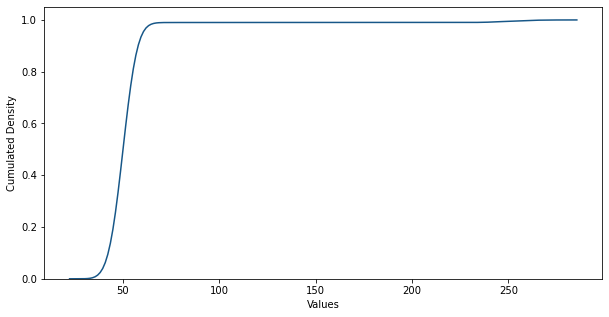

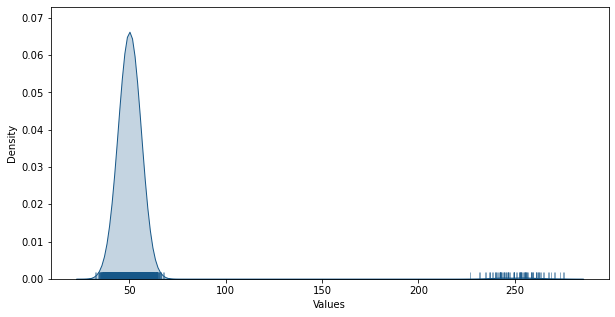

In [57]:
x_array, fig, fig2, quantile_values, quantile_specific_values = identify_outliers(data, verbose=False)

In [62]:
fig.savefig('plots/identify_outlier_c_distribution.jpg')
fig2.savefig('plots/identify_outlier_distribution.jpg')

In [59]:
quantile_values

array([ 56.5886448 ,  56.93073819,  57.32030546,  57.69971946,
        58.19063665,  58.70392701,  59.21575297,  60.01156923,
        61.40868942,  67.55228929, 275.74517164])

In [60]:
print("Quantile, and corresponding value: ")
print()
for q, v in zip([i/100 for i in range(90, 101)], quantile_values):
    print("{} : {:.2f}".format(q, v))

Quantile, and corresponding value: 

0.9 : 56.59
0.91 : 56.93
0.92 : 57.32
0.93 : 57.70
0.94 : 58.19
0.95 : 58.70
0.96 : 59.22
0.97 : 60.01
0.98 : 61.41
0.99 : 67.55
1.0 : 275.75


The value steadily increases until the 99th quantile. There seems to have a drastic increase between the 99th and the 100th quantile, and this needs more investigation.

Then lets break the quantile into smaller sectores.

In [61]:
print("Quantile, and corresponding value: ")
print()
for q, v in zip([i/1000 for i in range(990, 1001)], quantile_specific_values):
    print("{} : {:.2f}".format(q, v))

Quantile, and corresponding value: 

0.99 : 67.55
0.991 : 238.26
0.992 : 242.18
0.993 : 244.36
0.994 : 246.76
0.995 : 251.62
0.996 : 253.74
0.997 : 255.86
0.998 : 259.57
0.999 : 263.69
1.0 : 275.75


When the quantile increases from 99.8% to 99.9%, the corresponding value also increases by 6. This is a big step compared to other gradual increases. There is an even greater increase from 99.9% to 100%.

Now lets zoom into the specific quantiles and see what's going on

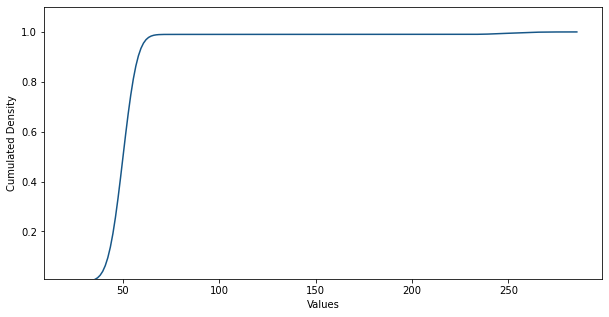

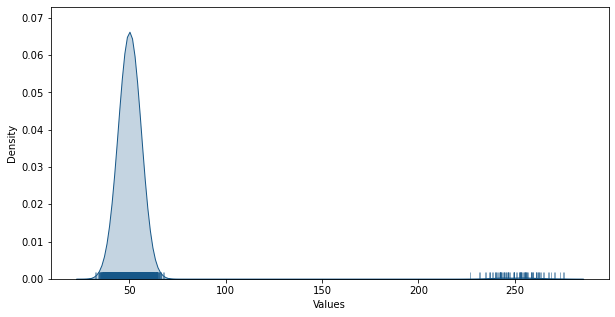

In [63]:
x_array, fig, fig2, quantile_values, quantile_specific_values = identify_outliers(data, 
                                                                                  y_lim=[0.01, 1.1],
                                                                                  verbose=False)

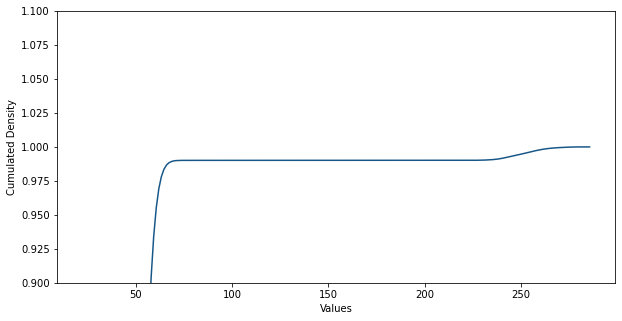

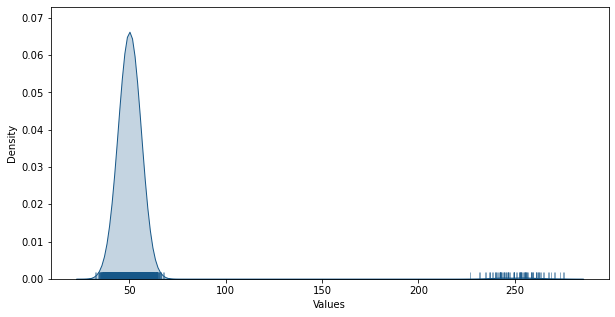

In [64]:
x_array, fig, fig2, quantile_values, quantile_specific_values = identify_outliers(data, 
                                                                                  y_lim=[0.9, 1.1],
                                                                                  verbose=False)

In [65]:
fig.savefig('plots/identify_outlier_c_distribution_zoom.jpg')

In [66]:
data.sum()

525212.0463263324

In [67]:
data[data>80].sum()

25130.09074177759

In [68]:
data[data>80].sum() /data.sum()

0.04784751400420735